<a href="https://colab.research.google.com/github/AhmadFirmanto/Portfolio-pyton/blob/main/t_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import researchpy as rp 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

# Data
* independent T Test (tidak ada hubunganya) = menggunakan independent T test
* paired sample T Test (ada kaitanya)

In [42]:
# data n=30

data_a = np.array([random.choice(range(60, 85)) for i in range(30)])
data_b = np.array([random.choice(range(65, 90)) for i in range(30)])

data = pd.DataFrame({'A' : data_a, 'B' : data_b})
data

,A,B
0,60,88
1,75,68
2,69,86
3,62,68
4,75,73
5,83,78
6,72,85
7,60,68
8,71,79
9,76,76


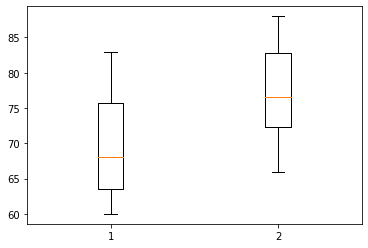

In [43]:
plt.boxplot([data_a, data_b]);

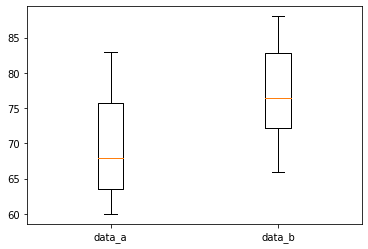

In [44]:
# melihat varian (persebaran data)
plt.boxplot([data_a, data_b], labels=['data_a', 'data_b']);

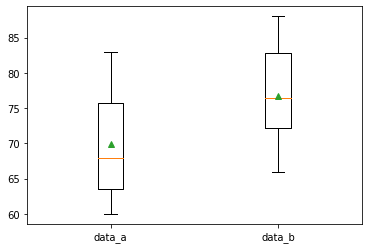

In [45]:
# menampilkan rata rata 

plt.boxplot([data_a, data_b], labels=['data_a', 'data_b'], showmeans=True);

In [46]:
# residu (selisi data)

data['residu'] = data_a - data_b
data

,A,B,residu
0,60,88,-28
1,75,68,7
2,69,86,-17
3,62,68,-6
4,75,73,2
5,83,78,5
6,72,85,-13
7,60,68,-8
8,71,79,-8
9,76,76,0


In [47]:
# kolom di buat variable

data.a = data_a
data.b = data_b
residu = data.residu

<ipython-input-47-9a7393f5f2f0>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.a = data_a
<ipython-input-47-9a7393f5f2f0>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.b = data_b


In [48]:
residu

0    -28
1      7
2    -17
3     -6
4      2
5      5
6    -13
7     -8
8     -8
9      0
10   -10
11   -13
12     3
13   -17
14   -18
15   -13
16    -6
17    -3
18     1
19    -1
20    -5
21    -9
22   -14
23   -10
24   -23
25     8
26   -17
27    -8
28    12
29     4
Name: residu, dtype: int64

# normalitas tes

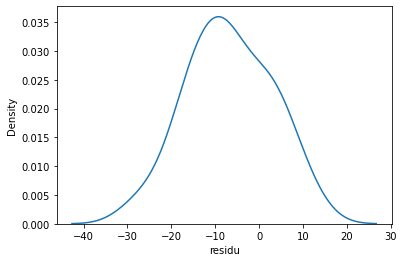

In [49]:
# residu nya harus berdistribusi secara normal
# menggunakan kernel density estimation - library seaborn

sns.kdeplot(residu)

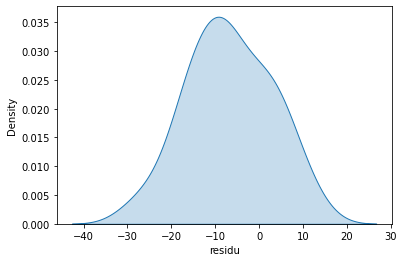

In [50]:
sns.kdeplot(residu, shade=True)

In [51]:
# bersistribusi secara normal dengan probabilistic plot

stats.probplot(residu)

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-28, -23, -18, -17, -17, -17, -14, -13, -13, -13, -10, -10,  -9,
          -8,  -8,  -8,  -6,  -6,  -5,  -3,  -1,   0,   1,   2,   3,   4,
           5,   7,   8,  12])),
 (9.969723926837059, -6.833333333333335, 0.9945064645141287))

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-28, -23, -18, -17, -17, -17, -14, -13, -13, -13, -10, -10,  -9,
          -8,  -8,  -8,  -6,  -6,  -5,  -3,  -1,   0,   1,   2,   3,   4,
           5,   7,   8,  12])),
 (9.969723926837059, -6.833333333333335, 0.9945064645141287))

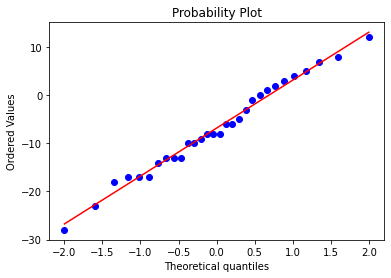

In [52]:
# grafik probabilistic plot 

stats.probplot(residu, plot=plt)

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-28, -23, -18, -17, -17, -17, -14, -13, -13, -13, -10, -10,  -9,
          -8,  -8,  -8,  -6,  -6,  -5,  -3,  -1,   0,   1,   2,   3,   4,
           5,   7,   8,  12])),
 (9.969723926837059, -6.833333333333335, 0.9945064645141287))

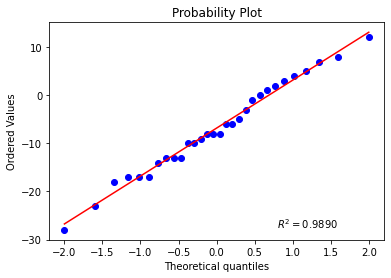

In [53]:
# r square 

stats.probplot(residu, plot=plt, rvalue=True)

* apabila titik titik biru mendekati garis maka berdistribusi normal
* apabila titik biru jauh dari garis maka tidak berdistribusi normal
* r square menunjukan seberapa dekat titik biru ke garis

In [54]:
# uji shapiro

stats.shapiro(residu)

ShapiroResult(statistic=0.9862548112869263, pvalue=0.9565725922584534)

* apabila nilai p-value melebihi 0.05 menerima H0 = berdistribusi normal

# tes homogenity

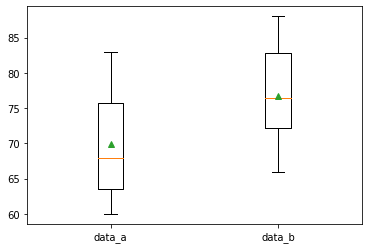

In [55]:
# homogenity 
# apakah varian dari data_a dan data_b itu homogen (mirip atau hampir sama)

plt.boxplot([data_a, data_b], labels=['data_a', 'data_b'], showmeans=True);

In [56]:
# uji Levene

stats.levene(data_a, data_b)

LeveneResult(statistic=1.7085987261146502, pvalue=0.19632584761970606)

* apabila p-value lebih besar dari 0.05 terima H0 = homogen

# uji T

In [62]:
# uji T 
# menggunakan mann Whitney

stats.ttest_ind(data_a, data_b)

Ttest_indResult(statistic=-3.756244053880827, pvalue=0.0004020690534100095)

In [63]:
# independent T Test
#table T
# degre of fredom

stats.t.interval(0.95, loc=data_a.mean(), scale=data_a.std() / np.sqrt(30), df=29)

(67.15413902165815, 72.71252764500852)